# Numerische Optimierungsverfahren

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

## Das Bergsteigerverfahren

In [2]:
import math

def f(x):
    return math.cos(x) + 3 * math.sin(0.6 * x - 2) + 3 * math.cos(2 * x - 2)

def optimize_function(x0, delta, max_iter):
    # Initialisiere den aktuellen x-Wert mit dem Startwert x0
    current_x = x0

    # Berechne den Funktionswert f(x0)
    current_f = f(current_x)

    # Iterationszähler
    iteration = 0

    # Schleife für die Optimierung
    while iteration < max_iter:
        # Berechne den Funktionswert f(x0 - delta)
        left_f = f(current_x - delta)

        # Berechne den Funktionswert f(x0 + delta)
        right_f = f(current_x + delta)

        # Überprüfe, ob f(x0 - delta) kleiner ist als der aktuelle Funktionswert
        if left_f < current_f:
            # Wähle x0 - delta als neuen x-Wert
            current_x = current_x - delta
            current_f = left_f
        # Überprüfe, ob f(x0 + delta) kleiner ist als der aktuelle Funktionswert
        elif right_f < current_f:
            # Wähle x0 + delta als neuen x-Wert
            current_x = current_x + delta
            current_f = right_f
        else:
            # Wenn weder links noch rechts eine Verbesserung bringt, breche die Schleife ab
            break

        # Inkrementiere den Iterationszähler
        iteration += 1

    # Gib das gefundene Minimum und den entsprechenden Funktionswert aus
    return current_x, current_f

# Test des Algorithmus
start_x = 0.0  # Startwert
step_size = 0.1  # Schrittweite
max_iterations = 100  # Maximale Anzahl Iterationen

min_x, min_f = optimize_function(start_x, step_size, max_iterations)
print("Minimum bei x =", min_x)
print("Wert der Zielfunktion an diesem Minimum =", min_f)


Minimum bei x = -0.5
Wert der Zielfunktion an diesem Minimum = -4.329510564441125


In [3]:
# Definiere die Funktion f(x)
def f(x):
    return np.cos(x) + 3 * np.sin(0.6 * x - 2) + 3 * np.cos(2 * x - 2)

# Bergsteigerverfahren
def local_minimum_search(start_x, stepsize, num_steps):
    
    # Aktueller x-Wert jedes Iterationsschrittes
    current_x = start_x

    # Liste zum Speichern aller Iterationspunkte (für grafische Darstellung)
    x_values = [current_x]
    y_values = [f(current_x)]

    for i in range(num_steps):
        current_value = f(current_x)
        left_value = f(current_x - stepsize)
        right_value = f(current_x + stepsize)

        # Falls Funktionswert links kleiner als aktueller Funktionswert, gehe nach links
        if left_value < current_value:
            current_x = current_x - stepsize
            
        # Falls Funktionswert rechts kleiner als aktueller Funktionswert, gehe nach rechts
        elif right_value < current_value:
            current_x = current_x + stepsize
        else:
            break 

        x_values.append(current_x)
        y_values.append(f(current_x))

    return current_x, f(current_x), x_values, y_values

### Anwendung des lokalen Suchverfahrens

In [4]:
# Startwert
start_x = 0.4

# Schrittweite
stepsize = 0.1

# Maximale Anzahl Iterationen
num_steps = 1000

# Lokalen Minimalpunkt suchen
min_x, min_y, x_iterations, y_iterations = local_minimum_search(start_x, stepsize, num_steps)
print('Lokaler Minimalpunkt bei x =', min_x, 'und y =', np.round(min_y, 2))

Lokaler Minimalpunkt bei x = -0.5 und y = -4.33


## Prompt an ChatGPT

1.	Definiere die Zielfunktion f mit f(x) = cos(x) + 3*sin(0.6x-2) + 3 * cos(2x-2)
2. Definiere einen Algorithmus in Abhängigkeit von Zielfunktion f, Startwert x0, Schrittweite delta und maximaler Anzahl Iterationen max_iter
3. Berechne den Funktionswert f(x0) 
4. Berechne den Funktionswert f(x0-delta) 
5. Falls f(x-delta) < f(x0), wähle x-delta als neuen x-Wert.
6. Falls nicht, berechne den Funktionswert f(x0+delta). 
7. Falls f(x+delta) < f(x0), wähle x+delta als neuen x-Wert.
8. Wiederhole so lange, bis sich der Funktionswert nicht mehr ändert oder die maximale Anzahl an Iterationen erreicht wurde.

Schreibe obigen Pseudocode als Python-Code. Schreibe den Code so, dass er für Schüler:innen gut verständlich ist.

https://chat.openai.com/share/24323bc5-7059-478b-9c78-f5ed1d7efb3e

### Grafische Darstellung

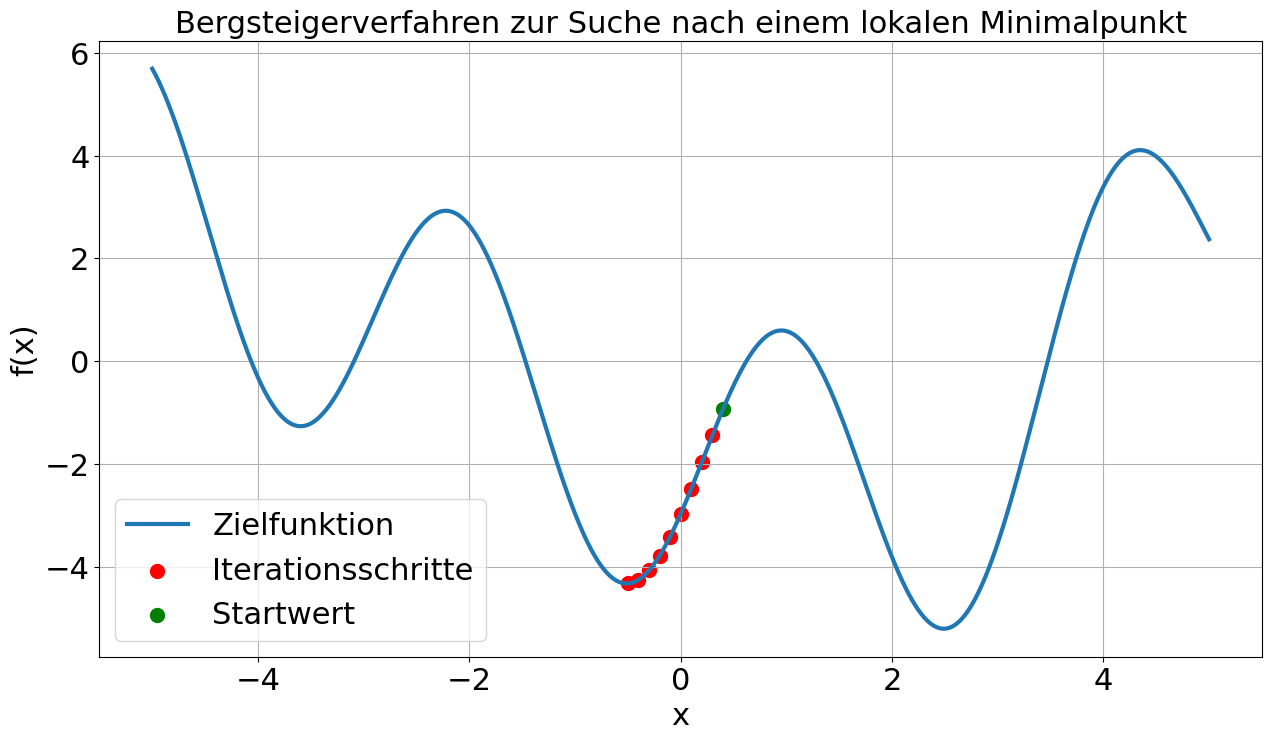

In [5]:
# Plot der Zielfunktion und Verlauf des Bergsteigerverfahrens
x_range = np.linspace(-5, 5, 1000)
y_range = [f(x) for x in x_range]

plt.figure(figsize=(15, 8))
plt.plot(x_range, y_range, label = 'Zielfunktion', linewidth = 3)
plt.scatter(x_iterations[1:], y_iterations[1:], marker='o', color='red',  s = 100, label='Iterationsschritte')
plt.scatter(start_x, f(start_x), color='green', marker='o', s = 100, label='Startwert')
#plt.scatter(local_min_x, local_min_value, color='green', marker='o', s = 150, label='Lokaler Minimalpunkt')
plt.xlabel('x', fontsize = 22)  
plt.ylabel('f(x)', fontsize = 22)   
plt.title('Bergsteigerverfahren zur Suche nach einem lokalen Minimalpunkt', fontsize = 22)

# Skalenwerte auf Achsen vergrößern
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.legend(fontsize=22) 
plt.grid(True)
plt.show()

# Das Gradientenabstiegsverfahren

In [8]:
import numpy as np
from scipy.optimize import minimize

def f(x):
    return math.cos(x) + 3 * math.sin(0.6 * x - 2) + 3 * math.cos(2 * x - 2)

# Wähle einen Startpunkt für den Algorithmus
start_x = 1.5

# Wende das Gradientenabstiegsverfahren an
result = minimize(f, start_x, method='BFGS')

# Gib das Ergebnis aus
print("Optimales x:", result.x)
print("Minimalwert von f(x):", result.fun)

Optimales x: [2.48979889]
Minimalwert von f(x): -5.210083199506812


In [9]:
def f(x):
    return (x[0] - 2)**2 + (x[1] - 5)**2

# Wähle einen Startpunkt für den Algorithmus
initial_values = np.array([0.0, 0.0])

# Wende das Gradientenabstiegsverfahren an
result = minimize(f, initial_values, method='BFGS')

# Gib das Ergebnis aus
print("Optimales x:", result.x)
print("Minimalwert von f(x):", result.fun)

Optimales x: [1.99999963 5.00000005]
Minimalwert von f(x): 1.367868682191627e-13
